# Numpy Tutorial

## Why is Numpy Faster?

### 1. Fixed Type

### 2. Faster to read less bytes of memory

Example:

a single integer is represented in Numpy with either specified by int32(4 bytes), int16(2 bytes), or int8(1 bytes). And the data type will be determined as the minimum type required to hold the objects in the  sequence (if dtype parameter is not set).

However, a single integer is represented in a list by 4 factors:
- Size
- Reference count
- Object type
- Object value

>The size is 4 bytes.
The reference count is 8 bytes.
The object type is also 8 bytes.
And the object value is also 8 bytes.



### 3. No type checking when iterating through objects

Another reason: When we are iterating through each item in a Numpy array, we don't have to do type checking each time. So in Python built-in lists, you could have a list of like an integer, then a float, then a string, then a Boolean, and you have to check each element you are looking at - what type it is.

### 4. Numpy utilizes contiguous memory

List utilizes the pointer structure:
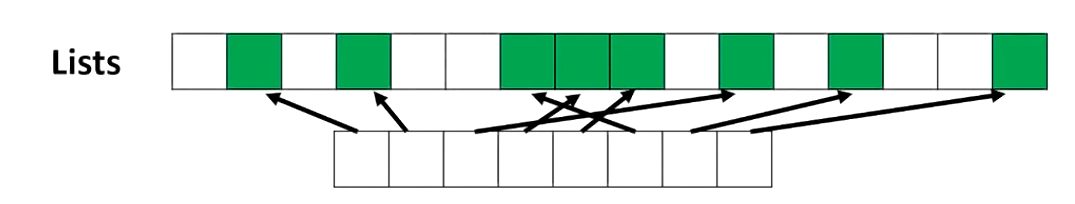

There is no pointers in Numpy:
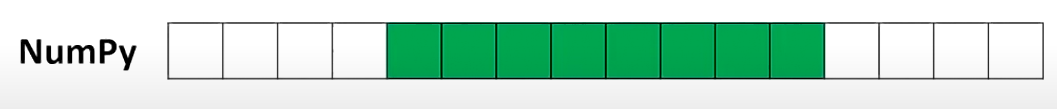

Benefits:
- CPUs have these so called SIMD vector processing units.

  So when this memory is all right next t each other, we can utilize this unit. Basically what SIMD stands for is Single Instruction Multiple Data, so we could like if we have to do it in addition of a lot of vlaues; instead of just doing one addition at a time, we can use this SIMD vector unit. Basically perform computations on all these values at one time. 

- Effective Cache Unilization
  


## How are Lists different from Numpy?

Lists

In [1]:
a = [1, 3, 5]
b = [1, 2, 3]

In [2]:
# We CAN't do this
a * b

TypeError: can't multiply sequence by non-int of type 'list'

Numpy

In [3]:
import numpy as np
a = np.array([1, 3, 5])
b = np.array([1, 2, 3])

In [4]:
# We CAN do this element-wise computation
a * b

array([ 1,  6, 15])

## Applications of Numpy
- Mathematics (Matlab replacement)

  I think the scipy library has even more mathematics like functions. so if numpy isn't accounting for you, try to look through the scipy documentations.

- Plotting (Matplotlib)

- Backend of many different applications (Pandas, Connect4, Digital Photography)

- Machine Learning
  Both directly and indirectly. One of the key concepts with ML is the idea of like tensors, and tensors' libraries are pretty similiar to Numpy's libraries.


## The Basics

In [5]:
import numpy as np

In [16]:
a = np.array([1,2,3], dtype='int16')
a

array([1, 2, 3], dtype=int16)

In [8]:
b = np.array([[9.0,8.0,7.0],[6.0,5.0,4.0]])
b

array([[9., 8., 7.],
       [6., 5., 4.]])

In [10]:
# Get Dimension
b.ndim

2

In [12]:
# Get Shape
# shape is the size in each dimension
a.shape

(3,)

In [13]:
b.shape

(2, 3)

In [17]:
# Get Type, hinted the memory taking
a.dtype

dtype('int16')

In [18]:
# Get Size of each item (in bytes), the memory taking by an element
a.itemsize

2

In [22]:
b.dtype

dtype('float64')

In [23]:
# float take 8 bytes of memory
b.itemsize

8

In [19]:
# Get total size (also in bytes)
a.nbytes

6

In [20]:
# Get number of elements
a.size

3

## Accessing/Changing specific elements, rows, columns, etc

In [24]:
a = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])
print(a)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]]


In [25]:
# Get a specific element [r, c]
a[1, 5]

13

In [29]:
# can use negative indices
a[1, -2]

13

In [26]:
# Get a specific row 
a[0, :]

array([1, 2, 3, 4, 5, 6, 7])

In [27]:
# Get a specific column
a[:, 2]

array([ 3, 10])

In [30]:
# Getting a little more fancy [start_index: end_index: step_size]
a[0, 1:-1:2]

array([2, 4, 6])

In [32]:
a[1,5] = 20
a

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 20, 14]])

In [33]:
a[:,2] = [1,2]
print(a)

[[ 1  2  1  4  5  6  7]
 [ 8  9  2 11 12 20 14]]


#### 3-d example

In [34]:
b = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(b)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [35]:
# Get specific element (work outside in)
b[0,1,1]

4

In [36]:
# similar kind stuff with the colons like above
b[:,1,:]

array([[3, 4],
       [7, 8]])

In [40]:
# play around with this
# anticipation before running the code
b[:,0,:]

In [39]:
# anticipation before running the code
b[:,0,0]

In [43]:
# replace (dimension must match)
b[:,1,:] = [[9,9],[8,8]]
b

array([[[1, 2],
        [9, 9]],

       [[5, 6],
        [8, 8]]])

## Initializing Different Types of Arrays

In [46]:
# All 0s matrix
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [45]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [48]:
# All 1s matrix
np.ones((4,2,2), dtype='int32')

array([[[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]]])

In [50]:
# Any other number
np.full((2,2), 99, dtype='float32')

array([[99., 99.],
       [99., 99.]], dtype=float32)

In [51]:
# Any other number (np.full_like())
# It allows us to take a shape that's already built
# for example we'd like to reuse the shape of the array a
a

array([[ 1,  2,  1,  4,  5,  6,  7],
       [ 8,  9,  2, 11, 12, 20, 14]])

In [52]:
# just passed in the array, and the specified value to replace with
np.full_like(a, 4)

array([[4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4]])

In [53]:
# but one can also use this
np.full(a.shape, 4)

array([[4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4]])

In [57]:
# Random decimal numbers (between 0 and 1)
# Note NOT to pass a tuple (error will occur)
np.random.rand((4,2))

TypeError: 'tuple' object cannot be interpreted as an integer

In [54]:
np.random.rand(4,2)

array([[0.20201914, 0.95351975],
       [0.21864706, 0.11554589],
       [0.16593317, 0.15117894],
       [0.6142849 , 0.81910493]])

In [56]:
a

array([[ 1,  2,  1,  4,  5,  6,  7],
       [ 8,  9,  2, 11, 12, 20, 14]])

In [55]:
# if you wang to pass in a.shape,
# you can use random_sample()

np.random.random_sample(a.shape)

array([[0.96134457, 0.37925543, 0.4875704 , 0.97018417, 0.28505807,
        0.05116618, 0.19540282],
       [0.70006111, 0.8820011 , 0.14245709, 0.70825291, 0.28923501,
        0.52335697, 0.05657085]])

`randint(low, high=None, size=None, dtype=int)`

Return random integers from `low` (inclusive) to `high` (exclusive).
 If
`high` is None (the default), then results are from \[0, `low`).

In [85]:
# Random Integer values
# In this case high is not specified, so high=None
# this returns 1 number [0, low=7)
np.random.randint(7)

4

In [61]:
np.random.randint(-4,8, size=(3,3))

array([[-3,  4,  0],
       [ 7,  3,  5],
       [ 1, -4,  7]])

In [86]:
# The identity matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [94]:
# Repeat an array
arr = np.array([1,2,3])

In [97]:
# Repeat elements of an array.
r1 = np.repeat(arr,3)
r1

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [102]:
arr = np.array([[1,2,3], [4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [100]:
# By default, it uses the flattened input array, and return a flat output array.
# The input array (arr in this case) will be flattened first
np.repeat(arr, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6])

In [103]:
np.repeat(arr, 3, axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

In [105]:
ex = np.ones((5,5))
ex

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [112]:
ex[1:4, 1:4] = np.zeros((3,3))

In [113]:
ex

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [114]:
ex[2, 2] = 9

In [115]:
ex

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 9., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

## Be careful when copying arrays!!!

In [124]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [133]:
# use assignmet =
b = a
b[0] = 100
a

array([100,   2,   3])

In [128]:
# use copy() function
a = np.array([1,2,3])
b = a.copy()
b[0] = 100

print(a)

[1 2 3]


## Mathematics

In [134]:
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


In [135]:
b = np.array([1,0,1,0])
a + b

array([2, 2, 4, 4])

In [136]:
# Take the cosine
np.cos(a)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362])

### For a lot more:
https://docs.scipy.org/doc/numpy/reference/routines.math.html

### Linear Algebra

In [137]:
a = np.ones((2,3))
print(a)

b = np.full((3,2), 2)
print(b)

[[1. 1. 1.]
 [1. 1. 1.]]
[[2 2]
 [2 2]
 [2 2]]


In [138]:
# matrix multiplication
np.matmul(a,b)

array([[6., 6.],
       [6., 6.]])

In [140]:
# Find the determinant
c = np.identity(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [141]:
np.linalg.det(c)

1.0

## Reference docs:
https://docs.scipy.org/doc/numpy/reference/routines.linalg.html

- Determinant
- Trace
- Singular Vector Decomposition
- Eigenvalues
- Matrix Norm
- Inverse
- Etc...

### Statistics

In [143]:
stats = np.array([[1,2,3],[4,5,6]])
stats

array([[1, 2, 3],
       [4, 5, 6]])

In [144]:
np.min(stats)

1

In [146]:
np.max(stats)

6

In [147]:
# find the max element across each columns
np.max(stats, axis=1)

array([3, 6])

In [149]:
# sum elements across each rows
np.sum(stats, axis=0)

array([5, 7, 9])

### Reorganizing Arrays

In [150]:
before = np.array([[1,2,3,4],[5,6,7,8]])
print(before)

[[1 2 3 4]
 [5 6 7 8]]


In [153]:
before.reshape((8,1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [154]:
before.reshape((4,2))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [156]:
before.reshape((2,2,2))

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [162]:
# Vertically stacking vectors
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])
print(v1)

[1 2 3 4]


In [163]:
print(v2)

[5 6 7 8]


In [169]:
# a sequence of any type (tuple, list, etc) is supposed to be passed in
np.vstack((v1,v2,v1,v2))

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [1, 2, 3, 4],
       [5, 6, 7, 8]])

In [168]:
np.vstack([v1,v2,v1,v2])

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [1, 2, 3, 4],
       [5, 6, 7, 8]])

In [165]:
# Horizontal stack
h1 = np.ones((2,4))
h2 = np.zeros((2,2))
print(h1)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [166]:
print(h2)

[[0. 0.]
 [0. 0.]]


In [170]:
np.hstack((h1,h2))

array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.]])

### Miscellaneous
#### Load Data from File

In [173]:
filedata = np.genfromtxt('data.txt', delimiter=',')
filedata.astype('int32') 

print(filedata)

[[  1.  13.  21.  11. 196.  75.   4.   3.  34.   6.   7.   8.   0.   1.
    2.   3.   4.   5.]
 [  3.  42.  12.  33. 766.  75.   4.  55.   6.   4.   3.   4.   5.   6.
    7.   0.  11.  12.]
 [  1.  22.  33.  11. 999.  11.   2.   1.  78.   0.   1.   2.   9.   8.
    7.   1.  76.  88.]]


The reason it's back to the original float type is that this actually makes and returns a copy because the float and int32 type are different sizes; they can't just in place copy everything. It doesn't really makes sense to.

In [187]:
filedata = filedata.astype('int32') 
print(filedata)

[[  1  13  21  11 196  75   4   3  34   6   7   8   0   1   2   3   4   5]
 [  3  42  12  33 766  75   4  55   6   4   3   4   5   6   7   0  11  12]
 [  1  22  33  11 999  11   2   1  78   0   1   2   9   8   7   1  76  88]]


#### Boolean Masking and Advanced Indexing

In [180]:
filedata > 50

array([[False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False,  True,
        False, False, False, False, False, False, False,  True,  True]])

In [175]:
filedata[filedata > 50]

array([196,  75, 766,  75,  55, 999,  78,  76,  88])

In [181]:
# You can index with a list in Numpy and 
# that is why above mechanism works
a = np.array([1,2,3,4,5,6,7,8,9])
a[[1, 2, 8]]

array([2, 3, 9])

In [186]:
# see if any value is greater than 50 acorss each element in rows
np.any(filedata > 50, axis=0)

array([False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True])

In [188]:
# see if all values are greater than 50 acorss each element in columns
np.all(filedata > 50, axis=1)

array([False, False, False])

In [189]:
(filedata > 50) & (filedata < 100)

array([[False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False,  True,  True]])

In [172]:
# negate the result above
(~((filedata > 50) & (filedata < 100)))

array([[ True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True, False, False]])

In [192]:
# Index each of the blocked values below
a = np.arange(1, 31).reshape(6, 5)
print(a)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


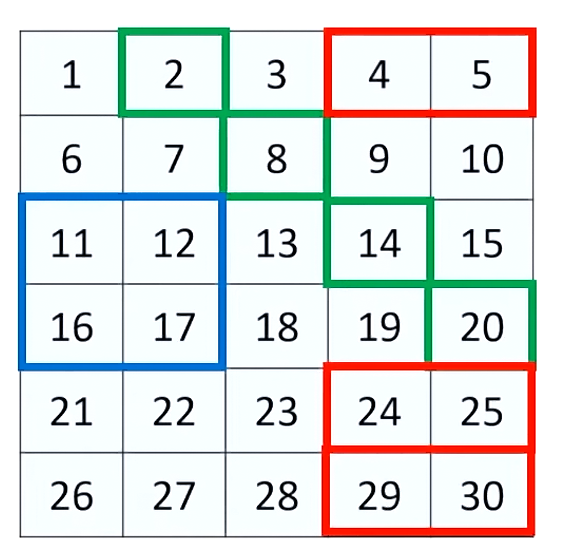

In [194]:
a[2:4, :2]

array([[11, 12],
       [16, 17]])

In [193]:
# select different rows and columns
a[[0,1,2,3], [1,2,3,4]]

array([ 2,  8, 14, 20])

In [195]:
a[[0,-2,-1], -2:]

array([[ 4,  5],
       [24, 25],
       [29, 30]])

In [197]:
# or this way
a[[0,4,5], 3:]

array([[ 4,  5],
       [24, 25],
       [29, 30]])